# Demo1: Simple Harmonic Oscillator

In this jupyter notebook, we will learn how to use the Euler's method to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
x^{t^{n+1}} = x^{t^n} + v^{t^n} \times \Delta t,
$$
and 
$$
v^{t^{n+1}} = v^{t^n} + a^{t^n} \times \Delta t.
$$

### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: 
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 109022120
# This is a simple example of how to solve a simple harmonic oscillator using the Euler method

# Step 1: set up the parameters of the problem
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.01

# Step 2: set up the time and solution arrays
T1 = 20
N = int(T1/dt)
t = np.linspace(0,T1,N+1)
# ans[:,0] = x, ans[:,1] = v
ans = np.zeros([N+1, 2])

# Step 3: set up the initial conditions
ans[0, :] = np.array([1,0])

# Step 4: solve the difference equation using the Euler method
for i in range(N):
    ans[i+1, :] = ans[i,:] + dt*np.array([ans[i,1], -omega0*ans[i,0]])


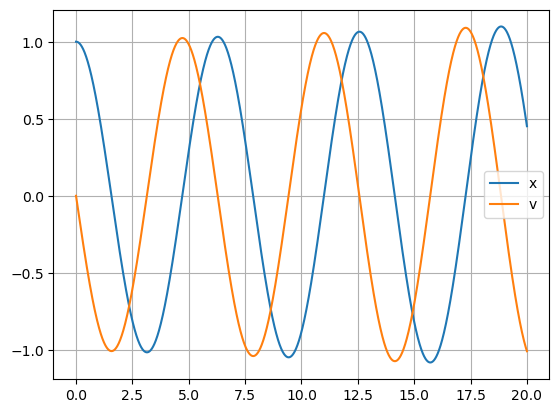

In [3]:
# Step 5: plot the solution

#TODO
plt.plot(t,ans[:, 0], label = "x")
plt.plot(t,ans[:, 1], label = "v")
plt.legend()
plt.grid()
plt.show()


We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

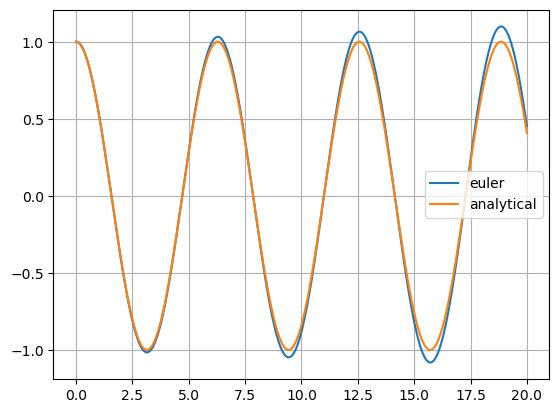

In [4]:
# Step 6: evaluate the analytical solution and plot it

# TODO
TA = np.zeros([N+1,2])
TA[:,0] = np.cos(omega0*t)
TA[:,1] = -np.sin(omega0*t)
plt.plot(t,ans[:,0], label = "euler")
plt.plot(t,TA[:,0], label = "analytical")
plt.legend()
plt.grid()
plt.show()


Another way to check the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

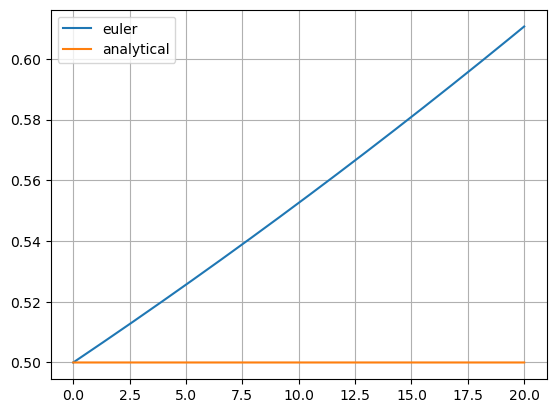

In [5]:
# Step 7: evaluate the energy (error) of the system

# TODO 
EN = 0.5*ans[:,0]**2+0.5*ans[:,1]**2
EA = 0.5*TA[:,0]**2+0.5*TA[:,1]**2
plt.plot(t,EN, label = "euler")
plt.plot(t,EA, label = "analytical")
plt.legend()
plt.grid()
plt.show()


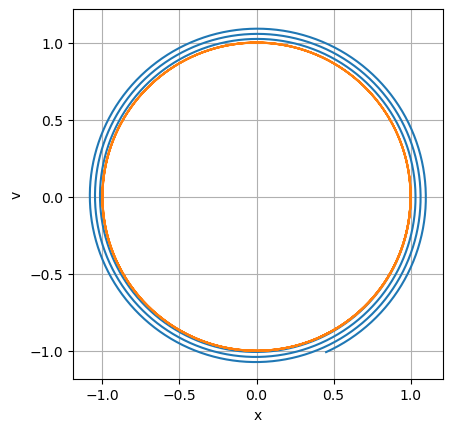

In [6]:
# Step 8: evaluate the phase space

# TODO
plt.plot(ans[:,0],ans[:,1])
plt.plot(TA[:,0],TA[:,1])
plt.grid()
plt.xlabel("x")
plt.ylabel("v")
plt.axis("square")
plt.show()


## Exercise 2: 
Check if the accuracy can be improved by reducing the time step to $\Delta t=0.001$.

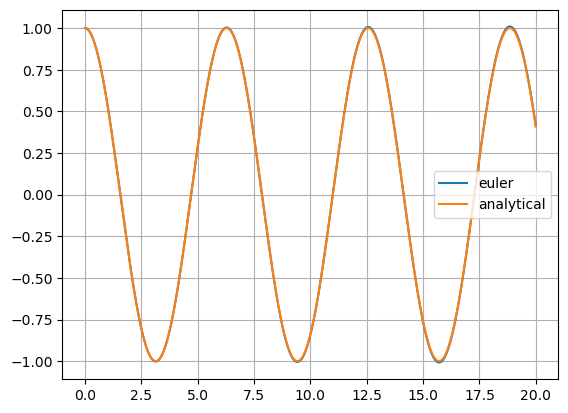

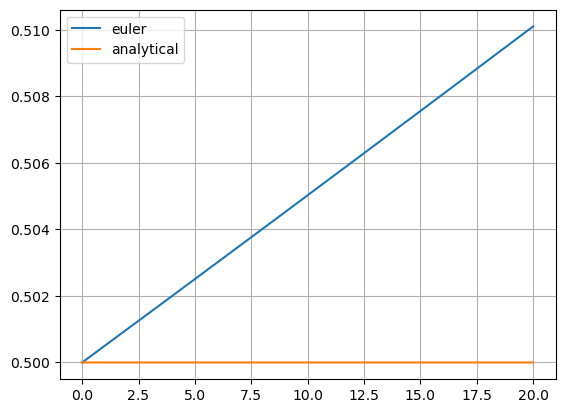

In [10]:
# TODO
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt = 0.001
T1 = 20
N = int(T1/dt)
t = np.linspace(0,T1,N+1)
# ans[:,0] = x, ans[:,1] = v
ans = np.zeros([N+1, 2])

ans[0, :] = np.array([1,0])
for i in range(N):
    ans[i+1, :] = ans[i,:] + dt*np.array([ans[i,1], -omega0*ans[i,0]])

TA = np.zeros([N+1,2])
TA[:,0] = np.cos(omega0*t)
TA[:,1] = -np.sin(omega0*t)

plt.figure(1)
plt.plot(t,ans[:,0], label = "euler")
plt.plot(t,TA[:,0], label = "analytical")
plt.legend()
plt.grid()
'''
plt.figure(2)
EN = 0.5*ans[:,0]**2+0.5*ans[:,1]**2
EA = 0.5*TA[:,0]**2+0.5*TA[:,1]**2
plt.plot(t,EN, label = "euler")
plt.plot(t,EA, label = "analytical")
plt.legend()
plt.grid()
'''
plt.show()



### Note

Reducing the time step is not the best solution. The better solution is to use higher-order schemes. Do NOT use Eulter's method in any production runs. 